In [190]:
import pandas as pd
from sklearn.datasets import load_sample_image

from matplotlib import pyplot as plt
import seaborn as sns


In [191]:
bg = pd.read_csv("BTTAIxNYBG-validation.csv")

## EDA

In [192]:
bg.head()

uniqueID                  classLabel  classID source             imageFile
0         7           microscope-slides        6      K  f09a8abe9e9e9ef2.jpg
1        20         illustrations-color        2    BHL  a6c6868387c6af8c.jpg
2        37  ordinary-pressed-specimens        9     YU  6062c68e8c34b292.jpg
3        59            animal-specimens        0    CAS  363617271597dfd9.jpg
4        60       biocultural-specimens        1    Met  4218d8d2f42b05e4.jpg

In [193]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uniqueID    10244 non-null  int64 
 1   classLabel  10244 non-null  object
 2   classID     10244 non-null  int64 
 3   source      10244 non-null  object
 4   imageFile   10244 non-null  object
dtypes: int64(2), object(3)
memory usage: 400.3+ KB


In [194]:
bg.describe()

uniqueID       classID
count   10244.000000  10244.000000
mean    61804.204217      4.503905
std     35559.126690      2.874831
min         7.000000      0.000000
25%     30926.000000      2.000000
50%     62253.500000      5.000000
75%     92531.500000      7.000000
max    122865.000000      9.000000

In [195]:
bg['classLabel'].unique()

array(['microscope-slides', 'illustrations-color',
       'ordinary-pressed-specimens', 'animal-specimens',
       'biocultural-specimens', 'illustrations-gray',
       'occluded-specimens', 'micrographs-transmission-light',
       'live-plants', 'mixed-pressed-specimens'], dtype=object)

In [196]:
bg['classLabel'].value_counts() # indicates there isn't class imbalance

classLabel
ordinary-pressed-specimens        1033
biocultural-specimens             1025
microscope-slides                 1024
animal-specimens                  1024
illustrations-gray                1024
occluded-specimens                1024
micrographs-transmission-light    1023
mixed-pressed-specimens           1023
illustrations-color               1022
live-plants                       1022
Name: count, dtype: int64

<Axes: xlabel='source'>

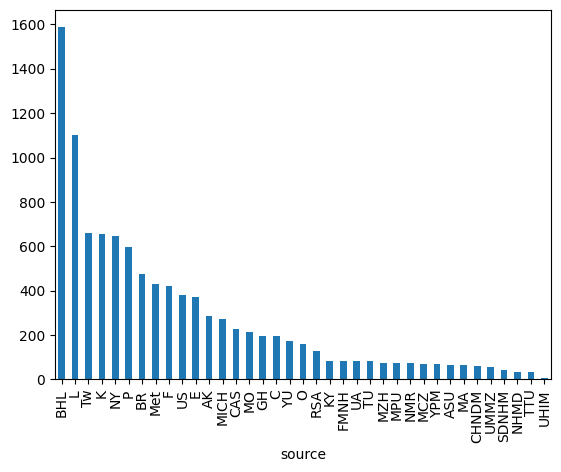

In [197]:
bg['source'].value_counts().plot.bar()

In [198]:
bg.isnull().any()

uniqueID      False
classLabel    False
classID       False
source        False
imageFile     False
dtype: bool

In [199]:
bg['imageFile'][0]

'f09a8abe9e9e9ef2.jpg'

In [200]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [215]:
image_path = 'BTTAIxNYBG-train/BTTAIxNYBG-train/0a0a4b6f2f4f4747.jpg'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

In [216]:
import os
from os import listdir
 
# get the path/directory
folder_dir = "BTTAIxNYBG-train/BTTAIxNYBG-train/"
for images in os.listdir(folder_dir):
 
    if (images.endswith(".jpg")):
        print(images)

27624e1e16371d15.jpg
068207c4ccccc087.jpg
e8d2f3e2e9e0c69c.jpg
d80a0e0e0ecee492.jpg
c281c1c1bcb48a8a.jpg
9a421436260e4c31.jpg
e1e9c0c240684246.jpg
eaaaa2b2b2b2b2b2.jpg
90e48e9e8e8c3696.jpg
6261614939b35096.jpg
8cccc848ce8c08cc.jpg
a4f4e2f2f8b2a8e8.jpg
bab6a6b2b2ba92b2.jpg
d24f4d2f19191b33.jpg
9d85b9edad981411.jpg
8a8e9e61e0e0b094.jpg
d8f3a14c4d8dc8b4.jpg
d95231f131f3f34b.jpg
a2babab2b2b2b0b0.jpg
ecc0cac6468e88ea.jpg
217b5b3b3b1f1f20.jpg
a0a08eb2b24e6eec.jpg
0004cc6969142906.jpg
aaa2a2a2a6a2b2a2.jpg
45555d5d554d6d2d.jpg
2ccaa0c2bc94d494.jpg
794ccc40522e1f95.jpg
e2a4a3e624641496.jpg
763121d1f1e126a7.jpg
968e869696969696.jpg
8e0e1f290f0f8e8e.jpg
cc933331353905e9.jpg
b5b71e25a756c7bf.jpg
e090c0e8e9c1c1cd.jpg
b2b2b0b8a0b4a480.jpg
648e1323474d2d8d.jpg
1c365e33334f371f.jpg
31fdfef2fc3eff25.jpg
3b614d2d41451551.jpg
323e0d9399998797.jpg
e0b2f032b3f0e2a0.jpg
343c8cb0b094140c.jpg
c6070b07873f73c9.jpg
82d2fa726b43c3e5.jpg
98a2a6b2f2e2b2aa.jpg
106c8e032b864639.jpg
6d49cbf2743135b5.jpg
e0f4f0fad0c5c

### Displaying an image

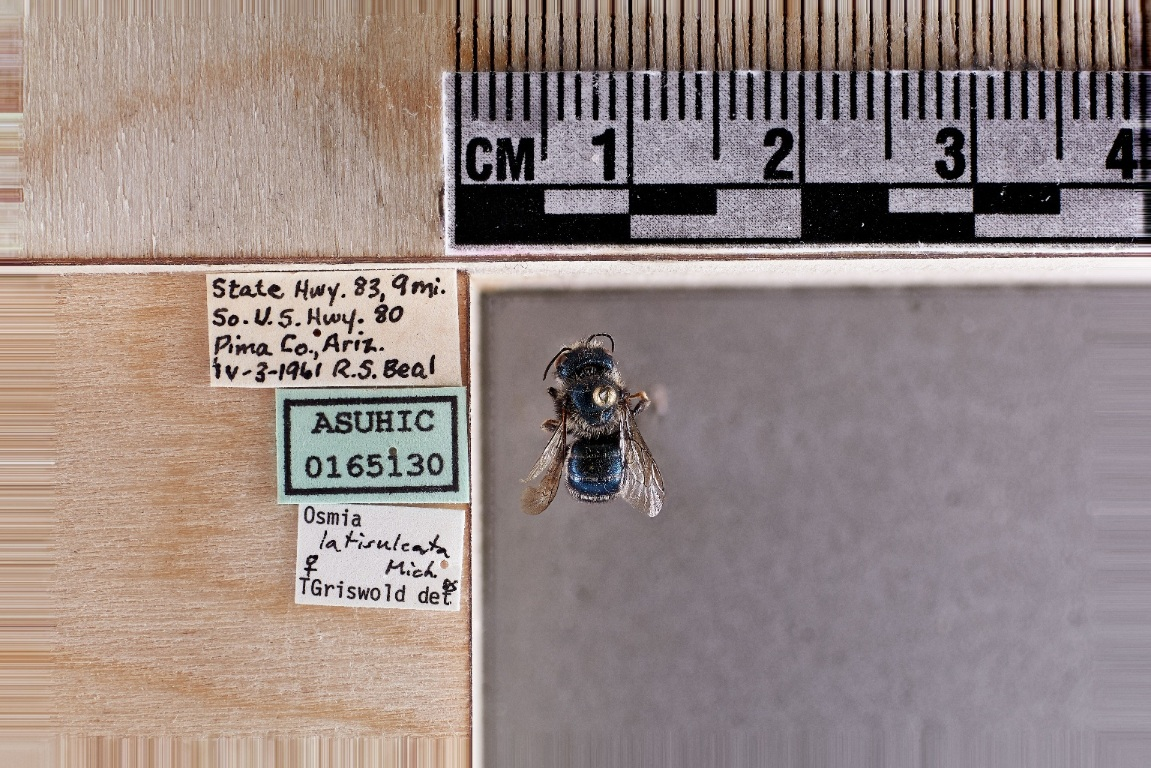

In [220]:
from IPython.display import display
from PIL import Image


path="BTTAIxNYBG-train/BTTAIxNYBG-train/0a0a4b6f2f4f4747.jpg"
display(Image.open(path))

In [206]:
directory = 'BTTAIxNYBG-train/BTTAIxNYBG-train'

In [207]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,                   
                                   validation_split=0.2)

In [208]:
train_generator = train_datagen.flow_from_directory(
    directory, 
    target_size=(256,256), 
    color_mode='rgb', 
    batch_size=64, 
    class_mode='categorical', 
    subset='training',
    shuffle=True,
    seed=42
)


Found 65557 images belonging to 1 classes.


In [209]:
import os

folder_path = 'BTTAIxNYBG-train/'
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]

# displays the first image found
if image_files:
    image_path = os.path.join(folder_path, image_files[0])
    display(Image(filename=image_path))
else:
    print("No image files found in the specified folder.")

No image files found in the specified folder.


In [210]:
from PIL import Image

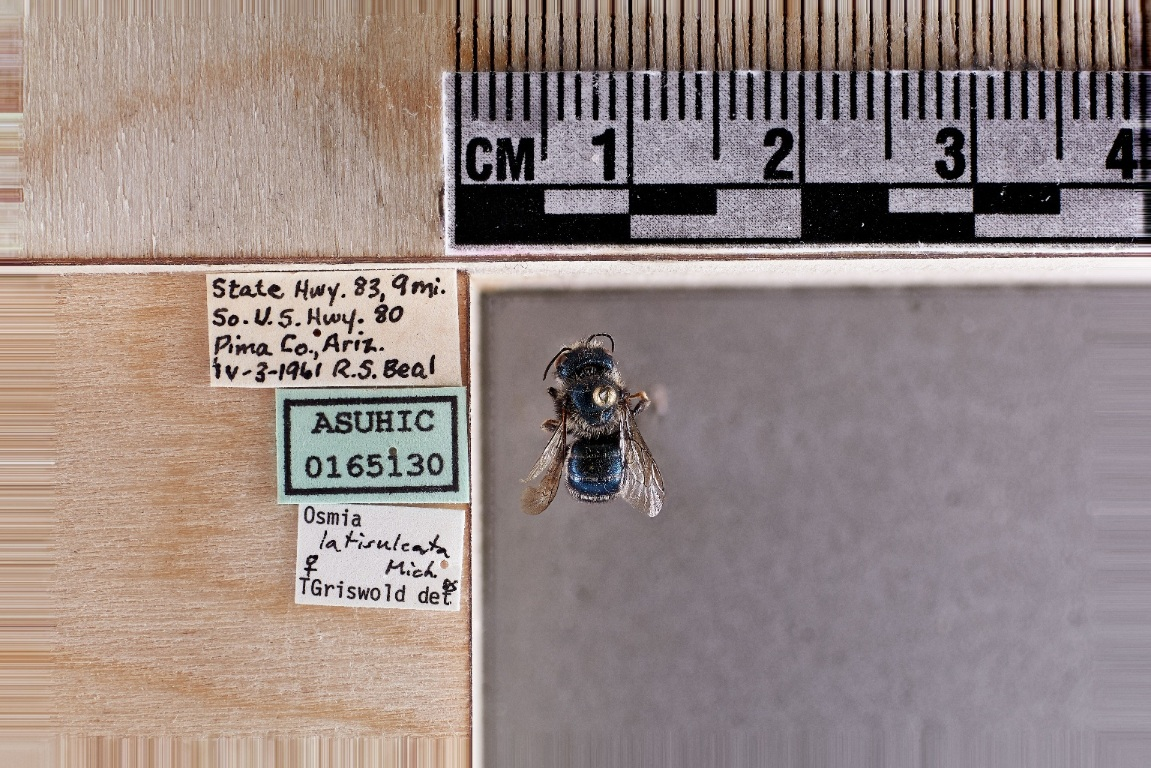

In [222]:
img = Image.open('BTTAIxNYBG-train/BTTAIxNYBG-train/0a0a4b6f2f4f4747.jpg')
img

In [212]:
img = '0a0a4b6f2f4f4747.jpg'

In [159]:
os.getcwd()

'/Users/maryhe/Documents/BTT AI/turtleheads/bttai-nybg-2024'

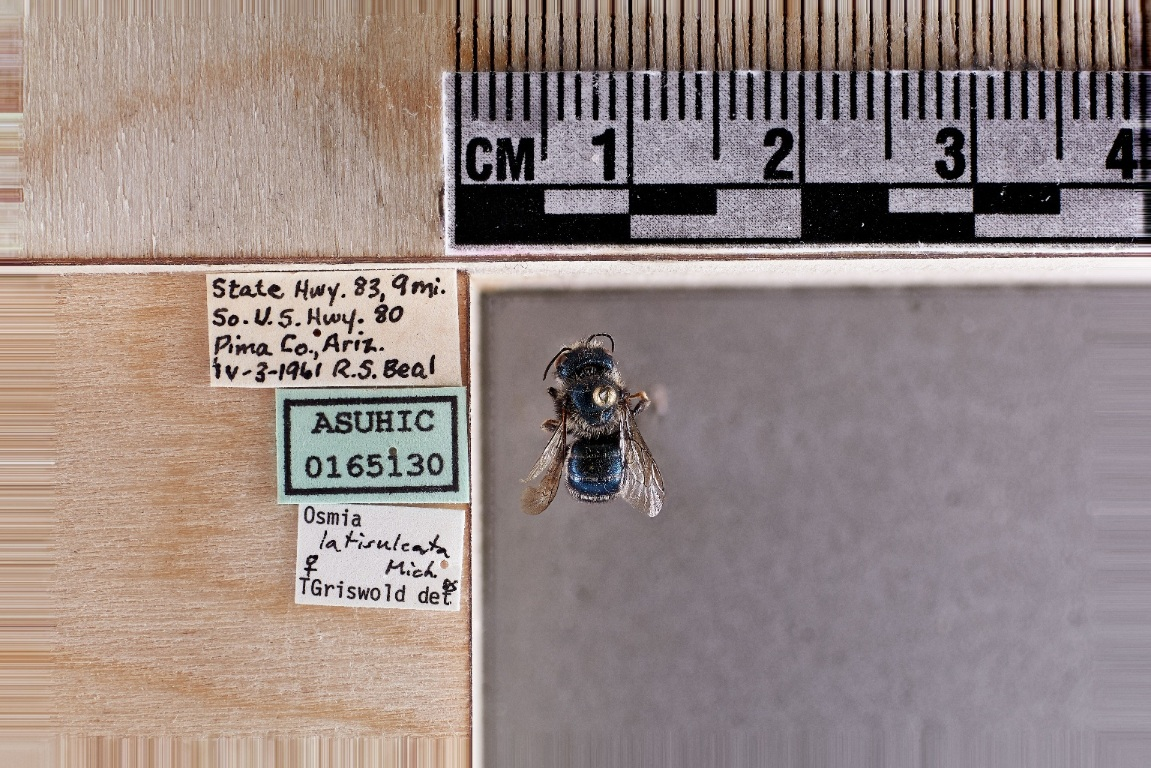

In [226]:
from PIL import Image

img = Image.open('BTTAIxNYBG-train/BTTAIxNYBG-train/0a0a4b6f2f4f4747.jpg')
img

In [227]:
from PIL import Image
import glob

image_list = []
for filename in glob.glob('BTTAIxNYBG-train/BTTAIxNYBG-train/*.pdf'):
    im = Image.open(filename)
    image_list.append(im)